<a href="https://colab.research.google.com/github/AngiePS/MT571-projects/blob/main/Proj2_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from numpy.linalg import svd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mat = loadmat("/content/drive/MyDrive/MT571/dado1.mat")
X = mat["X"]

In [ ]:
print(X.shape)

(5000, 1024)


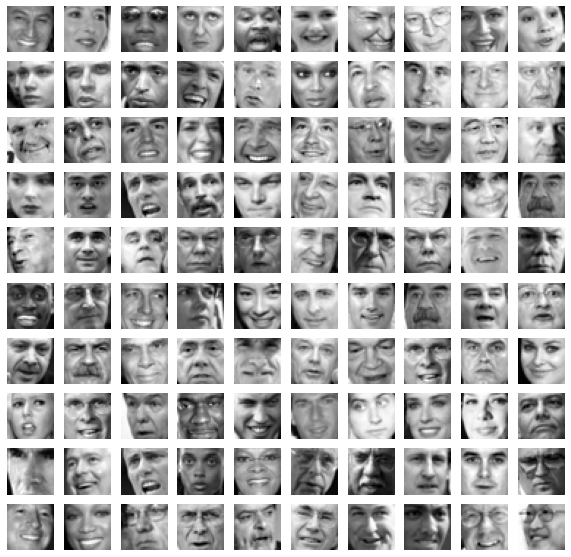

In [ ]:
#---------------------------------
# Mostrando 100 imagens aleatorias
fig,axis = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[np.random.randint(0,4999),:].reshape(32,32,order="F"),cmap="gray")
        axis[i,j].axis("off")

#Funções

In [ ]:
def normal(xe):
    mu = np.mean(xe,axis=0)
    std = np.std(xe,axis=0)
    xe_norm = (xe-mu)/std
    return xe_norm,std,mu

In [ ]:
def algpca(xe):
    m = xe.shape[0]
    n = xe.shape[1]
    sig=np.zeros((n,n))
    for j in range(m):
      sig = sig + 1/m * xe.T @ xe

    U,S,V = svd(sig)
    return U,S,V

In [ ]:
def projectData(X,U,K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))

    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]

    return Z

In [ ]:
def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[1]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]

    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T

    return X_rec

#Aplicar o PCA aos dados normalizados

In [ ]:
X_normal,std_normal,mu_normal = normal(X)
U_normal, S_normal = algpca(X_normal)[:2]

#Graficar os dados

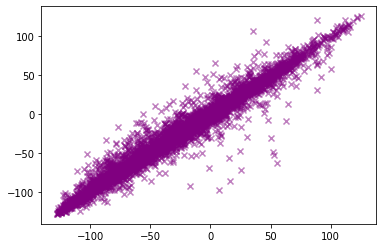

In [ ]:
plt.scatter(X[:,0],X[:,1],c="purple",marker="x",alpha=0.5)

In [ ]:
print("Autovetor principal U(:,1) =:",U_normal[:,0])

Autovetor principal U(:,1) =: [-0.01425307 -0.01474233 -0.01501482 ... -0.00895052 -0.00769526
 -0.00692969]


#Eigenfaces correspondentes aos 36 primeiros componentes principais.

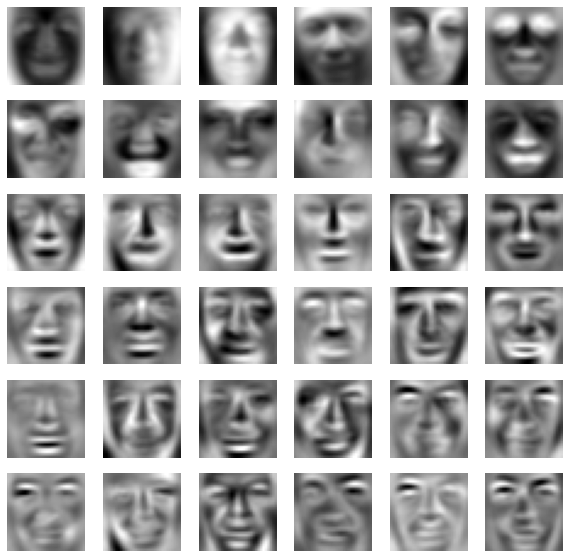

In [ ]:
u=U_normal[:,:36]
fig,axis = plt.subplots(6,6,figsize=(10,10))
k=0
for i in range(6):
    for j in range(6):
        axis[i,j].imshow(u[:,k].reshape(32,32,order="F"),cmap="gray")
        axis[i,j].axis("off")
        k+=1

#Projeção

In [ ]:
K=100
Z = projectData(X_normal,U_normal,K)
print("Projeção do primeiro exemplo:",Z[0][0])

Projeção do primeiro exemplo: 15.11610674084457


In [ ]:
X_rec = recoverData(Z,U_normal,K)
print("Aproximação do primeiro exemplo:",X_rec[0,:])

Aproximação do primeiro exemplo: [-0.24050631 -0.26139662 -0.30137928 ... -0.54852901 -0.25372376
  0.00390558]


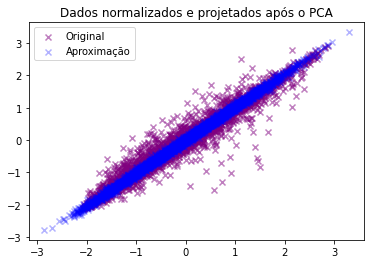

In [ ]:
plt.scatter(X_normal[:,0],X_normal[:,1],c="purple", marker="x",label="Original",alpha=0.5)
plt.scatter(X_rec[:,0],X_rec[:,1],c="blue",marker="x",label="Aproximação",alpha=0.3)
plt.title("Dados normalizados e projetados após o PCA")
plt.legend()

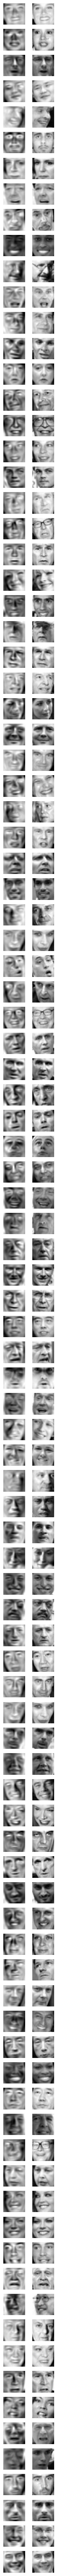

In [ ]:
fig,axis = plt.subplots(100,2,figsize=(2,100))
for i in range(100):
    j=np.random.randint(0,len(X)+1)
    axis[i,0].imshow(X_rec[j,:].reshape(32,32,order="F"),cmap="gray")
    axis[i,0].axis("off")
    axis[i,1].imshow(X[j,:].reshape(32,32,order="F"),cmap="gray")
    axis[i,1].axis("off")